<img src="figures/logo.png" width="250" height="250" alt="Computer Hope" >

<center> <H1> M2 DATASCIENCE: DEEP LEARNING II PROJECT </H1> </center>

**Students:**
>Seyni DIOP, seyni.diop@polytechnique.edu  
>Khmayes ABOUDA, khmayes.abouda@polytechnique.edu  
>Alhousseynou BALL, alhousseynou.ball@polytechnique.edu

**Professor:**
> Yohan Petetin

**Import needed functions and packages**

In [1]:
from training_functions import *
from dbn_functions import *
from rbm_functions import *
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from mlxtend.data import loadlocal_mnist
import numpy as np
from copy import  copy
from sklearn.model_selection import train_test_split

**LOAD DATA**

In [2]:
#. LOAD DATA
all_x_train, all_y_train = loadlocal_mnist(images_path='data/train-images.idx3-ubyte',
                                   labels_path='data/train-labels.idx1-ubyte')

x_test, y_test = loadlocal_mnist(images_path='data/t10k-images.idx3-ubyte',
                                 labels_path='data/t10k-labels.idx1-ubyte')

#binairize
all_x_train = (all_x_train > 127)*1
x_test = (x_test > 127)*1

# all_x_train is too big, so we will use just 10% of data
x_train,_,y_train,_ = train_test_split(all_x_train, all_y_train,
                                       train_size=0.10,stratify=all_y_train,
                                       random_state=1234)

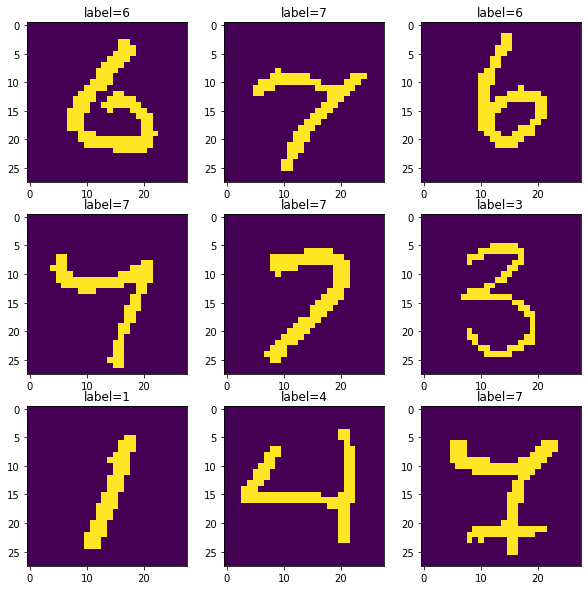

In [4]:
plt.figure(figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(x_train[i].reshape(28,28))
    plt.title("label="+format(y_train[i],'d'))
plt.show()

**HYPERPARAMETERS**

In [4]:
#. SPECIFIE HYPERPARAMATERS
epochs_rbm=15
epochs_retro=20
lr=0.01
batch_size=128
verbose=True

**1. COMPARISON ABOUT NUMBER OF LAYERS**

In [6]:
# Accuracy by nb_layers
results = []
dict_history_pr = dict()
dict_history_re = dict()
for nb_layers in range(5):
    cells = []
    cells.append([x_train.shape[1],200])
    for _ in range(nb_layers):
        cells.append((200, 200))
    cells.append((200, 10))
    print("Neurons:", cells)
    dnn = init_DBN(cells)
    res= train_compare(dnn, x_train, y_train, x_test, y_test,
                 epochs_retro, lr, batch_size,
                 epochs_rbm=epochs_rbm,
                 verbose=True)
    
    results.append([nb_layers+2, res[0][0], res[0][1], res[0][2], res[0][3]])
    dict_history_pr.update({nb_layers+2:res[1][0]})
    dict_history_re.update({nb_layers+2:res[1][1]})
results_np = np.array(results)

Neurons: [[784, 200], (200, 10)]
1- Pretrain+Retropopagate
Pretraining...
Pretraining finished
Epoch 20/20 - Batch 46/46: 100%|██████████| 46/46 [00:01<00:00, 31.99it/s, loss=0.00249]

----------------
2- Only retropropagation

Epoch 20/20 - Batch 46/46: 100%|██████████| 46/46 [00:01<00:00, 33.34it/s, loss=0.00231]

Accuracy: 1.0
Cross entropy loss: 0.0024870472306532604 


Accuracy: 1.0
Cross entropy loss: 0.002313204603347368 


Accuracy: 0.9383
Cross entropy loss: 0.22908151301402607 


Accuracy: 0.9375
Cross entropy loss: 0.23593324464771462 

Neurons: [[784, 200], (200, 200), (200, 10)]
1- Pretrain+Retropopagate
Pretraining...
Pretraining finished
Epoch 20/20 - Batch 46/46: 100%|██████████| 46/46 [00:01<00:00, 28.26it/s, loss=0.00057]

----------------
2- Only retropropagation

Epoch 20/20 - Batch 46/46: 100%|██████████| 46/46 [00:01<00:00, 27.50it/s, loss=0.00059]

Accuracy: 1.0
Cross entropy loss: 0.0005693444388867239 


Accuracy: 1.0
Cross entropy loss: 0.0005891736858868043 


Epoch 20/20 - Batch 46/46: 100%|██████████| 46/46 [00:02<00:00, 19.19it/s, loss=0.04511]

----------------
2- Only retropropagation

Epoch 20/20 - Batch 46/46: 100%|██████████| 46/46 [00:02<00:00, 19.99it/s, loss=0.01896]

Accuracy: 0.9856666666666667
Cross entropy loss: 0.045109082365505364 


Accuracy: 0.9951666666666666
Cross entropy loss: 0.018964856246984175 


Accuracy: 0.9233
Cross entropy loss: 0.3842377997127797 


Accuracy: 0.9354
Cross entropy loss: 0.3467390568812623 



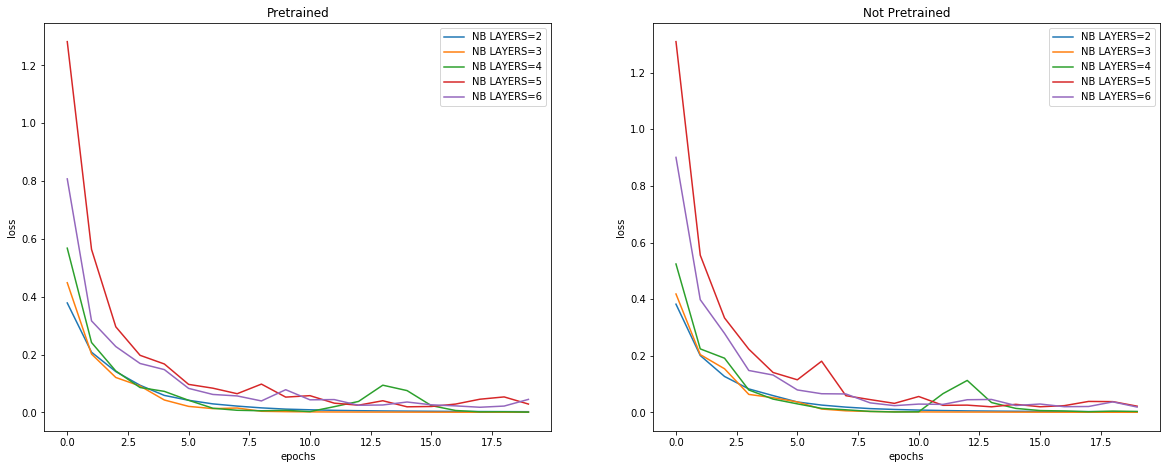

In [7]:
plt.figure(figsize=(20,7.5))
#----
plt.subplot(1,2,1)
for nb_layer in dict_history_pr.keys():
    plt.plot(dict_history_pr[nb_layer], label="NB LAYERS="+format(nb_layer,'d'))
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.title("Pretrained")
    plt.legend()
#---
plt.subplot(1,2,2)
for nb_layer in dict_history_re.keys():
    plt.plot(dict_history_re[nb_layer], label="NB LAYERS="+format(nb_layer,'d'))
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.title("Not Pretrained")
    plt.legend()
#---
plt.savefig('figures/history_by_layers.png')
plt.show()

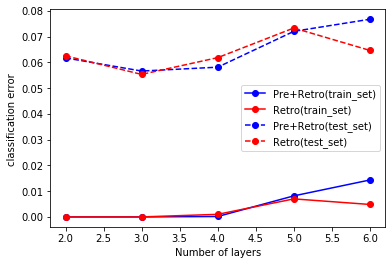

In [8]:
#Plot results
plt.figure()
plt.plot(results_np[:,0], 1-results_np[:,1],'-o', color='blue',label = 'Pre+Retro(train_set)')
plt.plot(results_np[:,0], 1-results_np[:,2],'o-', color='red', label='Retro(train_set)')
plt.plot(results_np[:,0], 1-results_np[:,3],'--o', color='blue', label = 'Pre+Retro(test_set)')
plt.plot(results_np[:,0], 1-results_np[:,4],'o--', color='red', label='Retro(test_set)')
plt.xlabel("Number of layers")
plt.ylabel("classification error ")
plt.legend()
plt.savefig('figures/classerror_nb_layers.png')
plt.show()

**2. COMPARISON ABOUT NUMBER OF CELLS**

In [5]:
cells_size = [100, 200, 300, 400, 500,600,700]
results = []
dict_history_pr = dict()
dict_history_re = dict()
for c_size in cells_size:
    cells = [(x_train.shape[1],c_size),(c_size,10)]
    print("Neurons:", cells)
    dnn = init_DBN(cells)
    res = train_compare(dnn, x_train, y_train, x_test, y_test,
                 epochs_retro, lr, batch_size,
                 epochs_rbm=epochs_rbm,
                 verbose=verbose)
    
    results.append([c_size, res[0][0], res[0][1], res[0][2], res[0][3]])
    dict_history_pr.update({c_size:res[1][0]})
    dict_history_re.update({c_size:res[1][1]})
results_np = np.array(results)

Neurons: [(784, 100), (100, 10)]
1- Pretrain+Retropopagate
Pretraining...
Pretraining finished
Epoch 20/20 - Batch 46/46: 100%|██████████| 46/46 [00:00<00:00, 94.80it/s, loss=0.00418] 

----------------
2- Only retropropagation

Epoch 20/20 - Batch 46/46: 100%|██████████| 46/46 [00:00<00:00, 88.56it/s, loss=0.00457] 

Accuracy: 1.0
Cross entropy loss: 0.00417996153361057 


Accuracy: 1.0
Cross entropy loss: 0.004570376965402124 


Accuracy: 0.9343
Cross entropy loss: 0.24612814966887145 


Accuracy: 0.9325
Cross entropy loss: 0.2524742576737876 

Neurons: [(784, 200), (200, 10)]
1- Pretrain+Retropopagate
Pretraining...
Pretraining finished
Epoch 20/20 - Batch 46/46: 100%|██████████| 46/46 [00:01<00:00, 34.39it/s, loss=0.00225]

----------------
2- Only retropropagation

Epoch 20/20 - Batch 46/46: 100%|██████████| 46/46 [00:01<00:00, 31.35it/s, loss=0.00241]

Accuracy: 1.0
Cross entropy loss: 0.0022479997649837193 


Accuracy: 1.0
Cross entropy loss: 0.0024076554190457515 


Accuracy: 0

Epoch 20/20 - Batch 46/46: 100%|██████████| 46/46 [00:02<00:00, 22.76it/s, loss=0.00162]

----------------
2- Only retropropagation

Epoch 20/20 - Batch 46/46: 100%|██████████| 46/46 [00:01<00:00, 23.59it/s, loss=0.00195]

Accuracy: 1.0
Cross entropy loss: 0.0016163844444193113 


Accuracy: 1.0
Cross entropy loss: 0.0019463328824704184 


Accuracy: 0.943
Cross entropy loss: 0.22102103871748177 


Accuracy: 0.9415
Cross entropy loss: 0.2284805231591869 

Neurons: [(784, 400), (400, 10)]
1- Pretrain+Retropopagate
Pretraining...
Pretraining finished
Epoch 20/20 - Batch 46/46: 100%|██████████| 46/46 [00:03<00:00, 13.69it/s, loss=0.00147]

----------------
2- Only retropropagation

Epoch 20/20 - Batch 46/46: 100%|██████████| 46/46 [00:03<00:00, 13.78it/s, loss=0.00142]

Accuracy: 1.0
Cross entropy loss: 0.0014739675414022961 


Accuracy: 1.0
Cross entropy loss: 0.0014229545205034816 


Accuracy: 0.9425
Cross entropy loss: 0.2309015560301693 


Accuracy: 0.9427
Cross entropy loss: 0.23405953

Epoch 20/20 - Batch 46/46: 100%|██████████| 46/46 [00:04<00:00,  9.98it/s, loss=0.00129]

----------------
2- Only retropropagation

Epoch 20/20 - Batch 46/46: 100%|██████████| 46/46 [00:04<00:00,  9.72it/s, loss=0.00147]

Accuracy: 1.0
Cross entropy loss: 0.0012900683694327124 


Accuracy: 1.0
Cross entropy loss: 0.0014724024996975403 


Accuracy: 0.943
Cross entropy loss: 0.23767725440786625 


Accuracy: 0.9418
Cross entropy loss: 0.2385974536839226 

Neurons: [(784, 600), (600, 10)]
1- Pretrain+Retropopagate
Pretraining...
Pretraining finished
Epoch 20/20 - Batch 46/46: 100%|██████████| 46/46 [00:05<00:00,  8.31it/s, loss=0.00109]

----------------
2- Only retropropagation

Epoch 20/20 - Batch 46/46: 100%|██████████| 46/46 [00:05<00:00,  8.03it/s, loss=0.00117]

Accuracy: 1.0
Cross entropy loss: 0.0010874194106272315 


Accuracy: 1.0
Cross entropy loss: 0.0011685392364856396 


Accuracy: 0.9437
Cross entropy loss: 0.23545352572370656 


Accuracy: 0.9443
Cross entropy loss: 0.2343035

Epoch 20/20 - Batch 46/46: 100%|██████████| 46/46 [00:06<00:00,  7.14it/s, loss=0.00105]

----------------
2- Only retropropagation

Epoch 20/20 - Batch 46/46: 100%|██████████| 46/46 [00:06<00:00,  6.93it/s, loss=0.00110]

Accuracy: 1.0
Cross entropy loss: 0.00104817189158362 


Accuracy: 1.0
Cross entropy loss: 0.0010996182159606876 


Accuracy: 0.9405
Cross entropy loss: 0.24488689804550232 


Accuracy: 0.9415
Cross entropy loss: 0.23994973697479885 



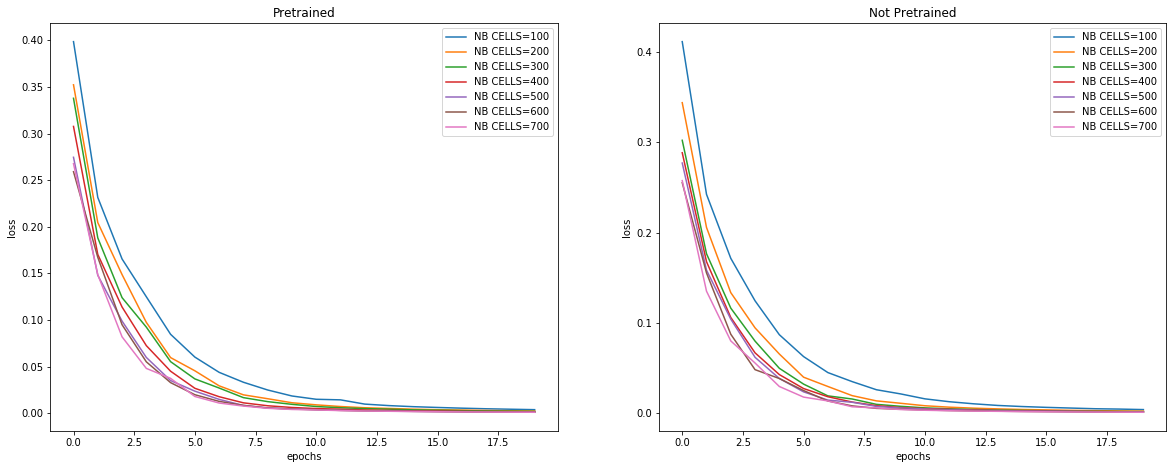

In [11]:
plt.figure(figsize=(20,7.5))
#----
plt.subplot(1,2,1)
for nb_cells in dict_history_pr.keys():
    plt.plot(dict_history_pr[nb_cells], label="NB CELLS="+format(nb_cells,'d'))
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.title("Pretrained")
    plt.legend()
#---
plt.subplot(1,2,2)
for nb_cells in dict_history_re.keys():
    plt.plot(dict_history_re[nb_cells], label="NB CELLS="+format(nb_cells,'d'))
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.title("Not Pretrained")
    plt.legend()
#---
plt.savefig('figures/history_by_cells.png')
plt.show()

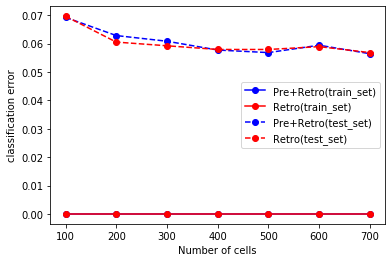

In [12]:
#Plot results
plt.figure()
plt.plot(results_np[:,0], 1-results_np[:,1],'-o', color='blue',label = 'Pre+Retro(train_set)')
plt.plot(results_np[:,0], 1-results_np[:,2],'o-', color='red', label='Retro(train_set)')
plt.plot(results_np[:,0], 1-results_np[:,3],'--o', color='blue', label = 'Pre+Retro(test_set)')
plt.plot(results_np[:,0], 1-results_np[:,4],'o--', color='red', label='Retro(test_set)')
plt.xlabel("Number of cells")
plt.ylabel("classification error")
plt.legend()
plt.savefig('figures/classerror_nb_cells.png')
plt.show()

**3. COMPARISON ABOUT SIZE OF TRAINING SET**

In [14]:
training_size = [3000, 7000, 10000, 30000,60000]
cells = [(x_train.shape[1],200),(200,10)]
results = []
dict_history_pr = dict()
dict_history_re = dict()
for t_size in training_size:
    print("Neurons:", cells)
    print("Training set size:", t_size)
    if t_size<len(all_x_train):
        x_train,_,y_train,_ = train_test_split(all_x_train, all_y_train,
                                       train_size=t_size,stratify=all_y_train,
                                       random_state=0)
    else:
        x_train , y_train= all_x_train, all_y_train
    dnn = init_DBN(cells)
    res = train_compare(dnn, x_train, y_train, x_test, y_test,
                 epochs_retro, lr, batch_size,
                 epochs_rbm=epochs_rbm,
                 verbose=verbose)
    
    results.append([t_size, res[0][0], res[0][1], res[0][2], res[0][3]])
    dict_history_pr.update({t_size:res[1][0]})
    dict_history_re.update({t_size:res[1][1]})
results_np = np.array(results)

Neurons: [(784, 200), (200, 10)]
Training set size: 3000
1- Pretrain+Retropopagate
Pretraining...
Pretraining finished
Epoch 20/20 - Batch 23/23: 100%|██████████| 23/23 [00:00<00:00, 34.59it/s, loss=0.00379]

----------------
2- Only retropropagation

Epoch 20/20 - Batch 23/23: 100%|██████████| 23/23 [00:00<00:00, 33.46it/s, loss=0.00427]

Accuracy: 1.0
Cross entropy loss: 0.00379331289682048 


Accuracy: 1.0
Cross entropy loss: 0.004273971958022802 


Accuracy: 0.9236
Cross entropy loss: 0.28789854941750065 


Accuracy: 0.9243
Cross entropy loss: 0.2875054304235549 

Neurons: [(784, 200), (200, 10)]
Training set size: 7000
1- Pretrain+Retropopagate
Pretraining...
Pretraining finished
Epoch 20/20 - Batch 54/54: 100%|██████████| 54/54 [00:01<00:00, 31.99it/s, loss=0.00222]

----------------
2- Only retropropagation

Epoch 20/20 - Batch 54/54: 100%|██████████| 54/54 [00:01<00:00, 31.16it/s, loss=0.00220]

Accuracy: 1.0
Cross entropy loss: 0.0022200029132895785 


Accuracy: 1.0
Cross entr

Epoch 20/20 - Batch 468/468: 100%|██████████| 468/468 [00:16<00:00, 27.86it/s, loss=0.00995]

----------------
2- Only retropropagation

Epoch 20/20 - Batch 468/468: 100%|██████████| 468/468 [00:15<00:00, 30.29it/s, loss=0.00925]

Accuracy: 0.9965166666666667
Cross entropy loss: 0.009953197025916698 


Accuracy: 0.99695
Cross entropy loss: 0.009247768614680378 


Accuracy: 0.9706
Cross entropy loss: 0.14981232813219936 


Accuracy: 0.9689
Cross entropy loss: 0.1488222482643802 



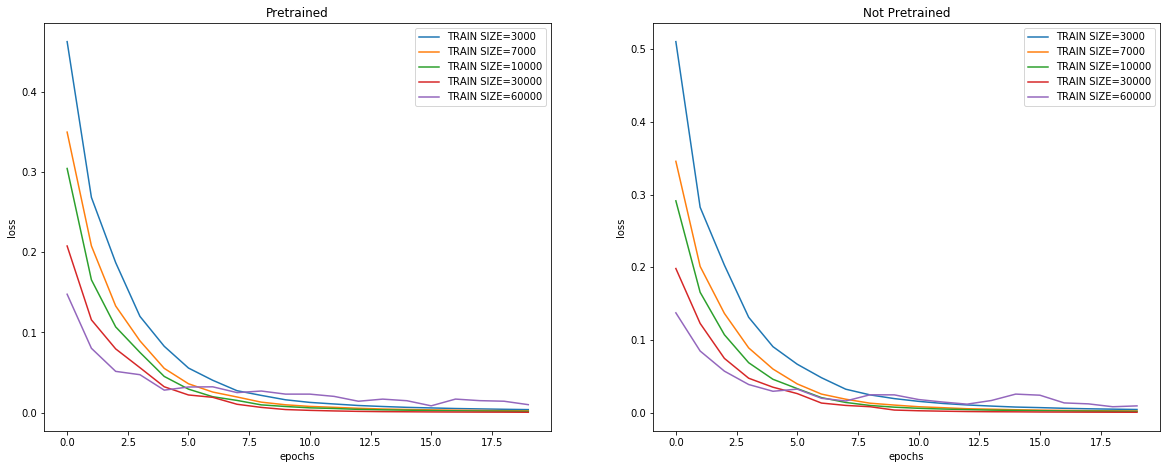

In [15]:
plt.figure(figsize=(20,7.5))
#----
plt.subplot(1,2,1)
for t_size in dict_history_pr.keys():
    plt.plot(dict_history_pr[t_size], label="TRAIN SIZE="+format(t_size,'d'))
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.title("Pretrained")
    plt.legend()
#---
plt.subplot(1,2,2)
for t_size in dict_history_re.keys():
    plt.plot(dict_history_re[t_size], label="TRAIN SIZE="+format(t_size,'d'))
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.title("Not Pretrained")
    plt.legend()
#---
plt.savefig('figures/history_by_trainsize.png')
plt.show()

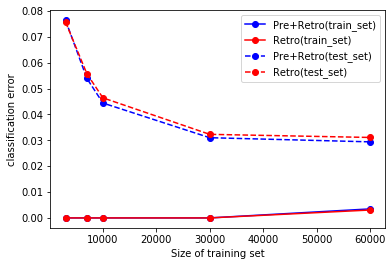

In [16]:
#Plot results
plt.figure()
plt.plot(results_np[:,0], 1-results_np[:,1],'-o', color='blue',label = 'Pre+Retro(train_set)')
plt.plot(results_np[:,0], 1-results_np[:,2],'o-', color='red', label='Retro(train_set)')
plt.plot(results_np[:,0], 1-results_np[:,3],'--o', color='blue', label = 'Pre+Retro(test_set)')
plt.plot(results_np[:,0], 1-results_np[:,4],'o--', color='red', label='Retro(test_set)')
plt.xlabel("Size of training set")
plt.ylabel("classification error")
plt.legend()
plt.savefig('figures/classerror_trainsize.png')
plt.show()

**4. BEST MODEL**

In [3]:
x_train , y_train= all_x_train, all_y_train

In [9]:
# Run our best model
epochs_rbm=20
epochs_retro = 50
cells = [(784,500),(500, 2000),(2000,10)]

x_train , y_train= all_x_train, all_y_train
dnn = init_DBN(cells)
res = train_compare(dnn, x_train, y_train, x_test, y_test,
                 epochs_retro, lr, batch_size,
                 epochs_rbm=epochs_rbm,
                 verbose=verbose)

1- Pretrain+Retropopagate
Pretraining...
Pretraining finished
  0%|          | 0/468 [00:00<?, ?it/s]

C:\Users\Seyni DIOP\Documents\Etudes\DEEP_LEARNING2\training_functions.py:111: RuntimeWarning: divide by zero encountered in log
  log_likelihood = -np.log(proba[range(len(x_train)),y_train])


Epoch 50/50 - Batch 468/468: 100%|██████████| 468/468 [02:01<00:00,  3.87it/s, loss=0.04142]

----------------
2- Only retropropagation

Epoch 50/50 - Batch 468/468: 100%|██████████| 468/468 [01:56<00:00,  4.01it/s, loss=0.05626]

Accuracy: 0.9923833333333333
Cross entropy loss: 0.04142107016950229 


Accuracy: 0.9903333333333333
Cross entropy loss: 0.05625994929527919 


Accuracy: 0.972
Cross entropy loss: 0.29021149457543827 


Accuracy: 0.9693
Cross entropy loss: 0.3605875062548354 



In [10]:
print("IN THE TRAINING SET")
print("Pretrained model accuracy:",res[0][0])
print("Not Pretrained model accuracy:",res[0][1])
print("-----------------------------")
print("IN THE TEST SET")
print("Pretrained model accuracy:", res[0][2])
print("Not Pretrained model accuracy:",res[0][3])

IN THE TRAINING SET
Pretrained model accuracy: 0.9923833333333333
Not Pretrained model accuracy: 0.9903333333333333
-----------------------------
IN THE TEST SET
Pretrained model accuracy: 0.972
Not Pretrained model accuracy: 0.9693


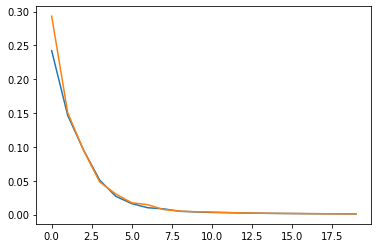

In [12]:
plt.plot(res[1][0])
plt.plot(res[1][1])